# Project Title -  Analysis on trending videos on youtube.

The data is taken from kaggle www.kaggle.com
This data has daily trending videos with likes,dislikes,comments,views,channel_title etc.

## Downloading the Dataset

The dataset is downloaded using opendatasets lib. from jovian.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasnaek/youtube-new' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sainisachin393
Your Kaggle Key: ········


  2%|▏         | 5.00M/201M [00:00<00:05, 37.7MB/s]

100%|██████████| 201M/201M [00:03<00:00, 58.1MB/s] 


The dataset has been downloaded and extracted.

In [4]:
data_dir = './youtube-new'

In [5]:
import os
os.listdir(data_dir)

['INvideos.csv',
 'USvideos.csv',
 'CAvideos.csv',
 'KR_category_id.json',
 'RU_category_id.json',
 'MX_category_id.json',
 'FRvideos.csv',
 'US_category_id.json',
 'JP_category_id.json',
 'CA_category_id.json',
 'JPvideos.csv',
 'IN_category_id.json',
 'GBvideos.csv',
 'RUvideos.csv',
 'GB_category_id.json',
 'FR_category_id.json',
 'KRvideos.csv',
 'MXvideos.csv',
 'DE_category_id.json',
 'DEvideos.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "new" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sainisachin393/new" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sainisachin393/new


'https://jovian.ai/sainisachin393/new'

## Data Preparation and Cleaning

Loading our data into data frame.
Cleaning of data for analysis.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [11]:
df=pd.read_csv('./youtube-new/CAvideos.csv')

In [12]:
df # df=dataframe

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [13]:
df.info() # gives information of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [14]:
df.describe()  # it gives us the statiscal value of the data.

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [15]:
df.isnull() # it is used to check whether there is null value or not in the data.

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40877,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40878,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40879,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.channel_title.unique() # gives array of unique channel_title

array(['EminemVEVO', 'iDubbbzTV', 'Rudy Mancuso', ..., 'SevenSuperGirls',
       'Corridor', 'DKDKTV'], dtype=object)

In [17]:
mostlikes=df.sort_values('likes',ascending=False).head(5) 
mostlikes #gives us the data of top most 5 liked videos.

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
36453,7C2z4GqqS5E,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",80738011,5053338,165854,1114800,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
36153,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
35900,7C2z4GqqS5E,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
35685,7C2z4GqqS5E,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",62796390,4470888,119046,905912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
35515,7C2z4GqqS5E,18.19.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880074,72707,692311,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


Above data frame shows the most liked 5 videos with likes, channel_title,dislikes etc.

In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sainisachin393/new" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sainisachin393/new


'https://jovian.ai/sainisachin393/new'

## Exploratory Analysis and Visualization

Now We are going to explore our data using some graphs.


In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

The histogram below shows the  total number of  liked videos from rows 9500 to 10000 .

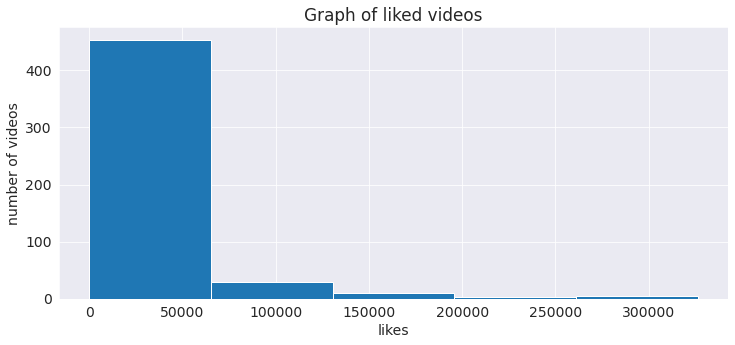

In [21]:
df2=df.loc[9500:10000]
plt.hist(df2.likes,bins=5,);
plt.xlabel('likes');
plt.ylabel('number of videos');
plt.title("Graph of liked videos");

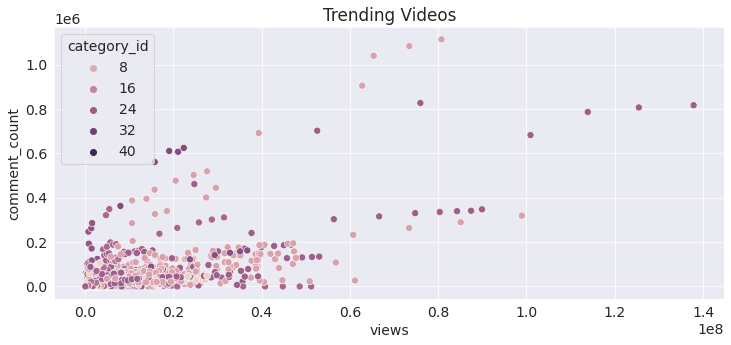

In [22]:
sns.scatterplot(x=df.views,y=df.comment_count,s=50,hue=df.category_id);
plt.title('Trending Videos');

Above is the scatter plot graph showing variation in comment_count and views of trending videos.

We use drop  function to remove required columns from dataframe.

In [23]:
df4=df.drop(columns=['category_id','views','comments_disabled','title','trending_date','video_id','channel_title','publish_time','tags','thumbnail_link','ratings_disabled','description','video_error_or_removed'],axis=1)
df4

,likes,dislikes,comment_count
0,787425,43420,125882
1,127794,1688,13030
2,146035,5339,8181
3,132239,1989,17518
4,1634130,21082,85067
...,...,...,...
40876,1701,99,1312
40877,460,66,51
40878,25900,224,3881
40879,2115,182,1672


In [24]:
df5=df4.loc[1000:1550] # Rows are between 10000 and 15000 because we have lots of row.

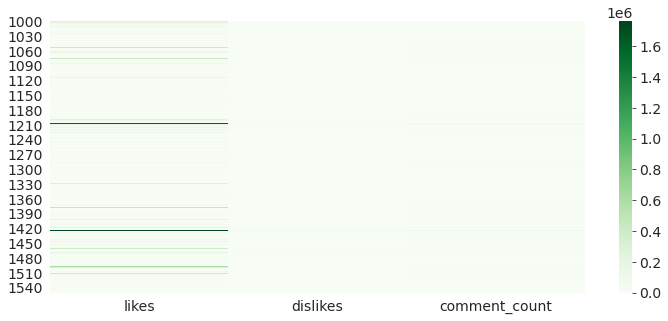

In [25]:
sns.heatmap(df5,cmap='Greens',fmt='d');

Above heatmap is between likes,dislikes,comment_count of trending youtube videos.

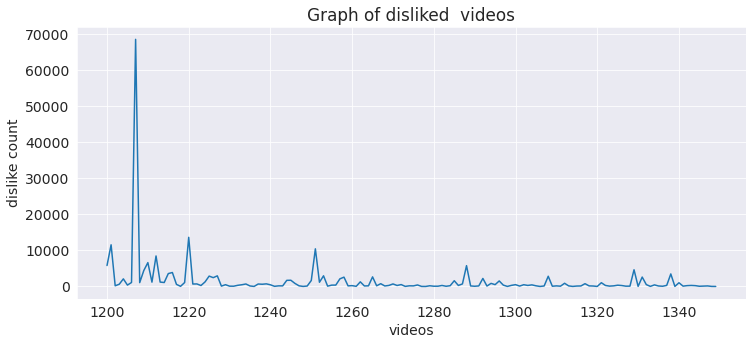

In [26]:
plt.title('Graph of disliked  videos');
plt.xlabel('videos');
plt.ylabel('dislike count');
plt.plot(df.dislikes[1200:1350]);

Above graphs shows the dislikes of videos from 1200 to 1300.

Let us save and upload our work to Jovian before continuing

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sainisachin393/new" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sainisachin393/new


'https://jovian.ai/sainisachin393/new'

## Asking and Answering Questions




 As we have completed our analyis.Now,let us do some questions.

####  Q1:  What are the  total number of views?

In [29]:
df.views.sum()  # gives the total number of views of all videos.

46891975069

#### Q2: Whatr are the top  5 Videos with most comments?

In [30]:
l6=df.loc[0:210]
l5=l6.sort_values(['comment_count'],ascending=False).head(5)
l5

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
23,PRlmRnU9qts,17.14.11,Jake Paul - Saturday Night (Song) feat. Nick C...,Jake Paul,22,2017-11-12T00:26:46.000Z,"Jake|""Paul""|""logan""|""paul""|""its""|""every""|""day""...",4204818,187890,167908,77348,https://i.ytimg.com/vi/PRlmRnU9qts/default.jpg,False,False,False,😃 SUBSCRIBE ► http://bit.ly/SUB2JAKEPAUL | ★ P...
87,k3kgQrU5-p0,17.14.11,Transforming a Homeless Mans Life... **SUPER E...,FaZe Rug,20,2017-11-11T02:35:26.000Z,"faze rug|""rug""|""faze""|""homeless""|""homeless mak...",1788176,178236,3054,46254,https://i.ytimg.com/vi/k3kgQrU5-p0/default.jpg,False,False,False,"Today, I decide to give back to the community ..."
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...


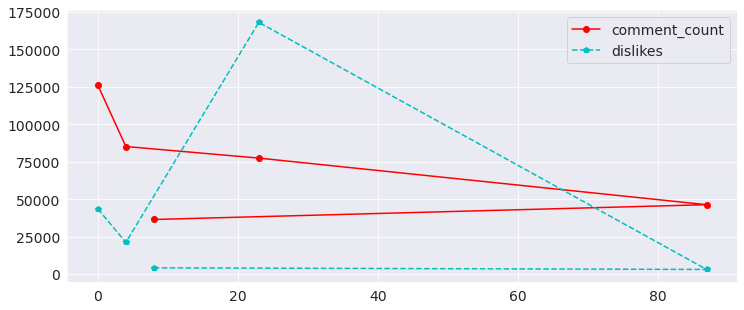

In [31]:
plt.plot(l5.comment_count,'o-r')
plt.plot(l5.dislikes,'c--p');
plt.legend(['comment_count','dislikes']);

Above graph shows the dislikes on most commented videos.
From above we can easily see that video which got nearabout 50000 dislikes that has 125000 comments in it.
Most disliked   video has nearabout 76000 comments in it.

#### Q3: Find the Average likes, dislikes, comments according to category_id?

In [32]:
df.groupby('category_id')[['likes','dislikes','comment_count']].mean()

,likes,dislikes,comment_count
category_id,,,
1,37767.962621,1510.319903,4896.394660
2,13405.422096,560.271955,2878.719547
10,151285.856339,5922.859823,14053.940499
15,23931.533875,501.363144,4941.837398
17,21330.972013,1179.177969,2748.956584
19,9568.658163,331.278061,1556.002551
20,38487.017857,1820.596726,7191.136161
22,25673.219001,2309.572716,4097.003898
23,51960.422475,1423.937185,5205.082428


Above table showing the avg. likes, dislikes, comments of the videos.

#### Q4:  which video has maximum dislikes from a sample of 1000 videos?

In [33]:
s_df=df.sample(1000)
s_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
27154,Ml9v3wHLuWI,18.01.04,Will Smith Tries Online Dating,Will Smith,24,2018-03-29T18:10:37.000Z,"comedy|""entertainment""|""will smith""|""will""|""sm...",4640731,155163,4100,13552,https://i.ytimg.com/vi/Ml9v3wHLuWI/default.jpg,False,False,False,Things get awkward when Will meets Sophia the ...
4125,o7iL2KzDh38,17.04.12,Martin Garrix & David Guetta - So Far Away (fe...,Martin Garrix,10,2017-12-01T05:01:33.000Z,"Martin Garrix|""EDM""|""Animals""|""Wizard""|""Proxy""...",3170624,216409,2603,13069,https://i.ytimg.com/vi/o7iL2KzDh38/default.jpg,False,False,False,Out now on iTunes and Spotify: http://stmpdrcr...
9255,WSEaxpfRpgg,17.30.12,GUMMY FOOD vs REAL FOOD!,Rosanna Pansino,26,2017-12-28T15:18:21.000Z,"challenge|""gummy""|""real food""|""food""|""gross""|""...",974810,39661,595,7194,https://i.ytimg.com/vi/WSEaxpfRpgg/default.jpg,False,False,False,Today I played the Real Food vs Gummy Food Cha...
9542,gNPUpnCcoWw,17.31.12,Best Food 2017 - MUST EAT! + Top Travel Destin...,Mark Wiens,19,2017-12-31T02:13:38.000Z,"street food|""street food compilation""|""Mark Wi...",68150,5518,75,836,https://i.ytimg.com/vi/gNPUpnCcoWw/default.jpg,False,False,False,"2017 has been amazing, thank you for being par..."
4584,9_Ztk7_v87s,17.06.12,猎场 第52集预告,Leungwai Ling,22,2017-12-05T00:28:02.000Z,"猎场|""52集预告""",27276,17,4,0,https://i.ytimg.com/vi/9_Ztk7_v87s/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19546,V5cOvyDpWfM,18.22.02,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,17,2018-02-19T01:37:11.000Z,"mlg highlights|""mlg""|""basketball""|""highlights""...",17030271,41743,141315,53209,https://i.ytimg.com/vi/V5cOvyDpWfM/default.jpg,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...
15755,XBCi2W70jdI,18.02.02,"2018년 2월 1일 (목) 뉴스룸 다시보기 - 상속 부동산, MB 것 차명재산 인정",JTBC News,25,2018-02-01T14:30:08.000Z,"뉴스룸 다시보기|""뉴스룸 풀영상""|""뉴스 풀영상""|""뉴스 다시보기""|""JTBC LI...",101337,779,87,166,https://i.ytimg.com/vi/XBCi2W70jdI/default.jpg,False,False,False,"1. 상속 부동산, MB 것 차명재산 인정 2:28\n\n이명박 전 대통령의 조카..."
18357,wIimU5-UEPc,18.16.02,Can Selena Gomez remember her own lyrics?,BBC Radio 1,10,2018-02-15T08:00:02.000Z,"Selena Gomez|""Demi Lovato""|""Zedd""|""Barney The ...",1208480,47369,945,2620,https://i.ytimg.com/vi/wIimU5-UEPc/default.jpg,False,False,False,Grimmy gets Selena Gomez to take the 'Remember...
27500,pMDLpmIk9RA,18.02.04,The Queen & British Royal Family Arrive At St ...,Royal Reviewer,24,2018-04-01T11:30:28.000Z,"the|""queen""|""the queen""|""queen elizabeth""|""eli...",54681,812,40,152,https://i.ytimg.com/vi/pMDLpmIk9RA/default.jpg,False,False,False,In this video we will be taking a look at: The...


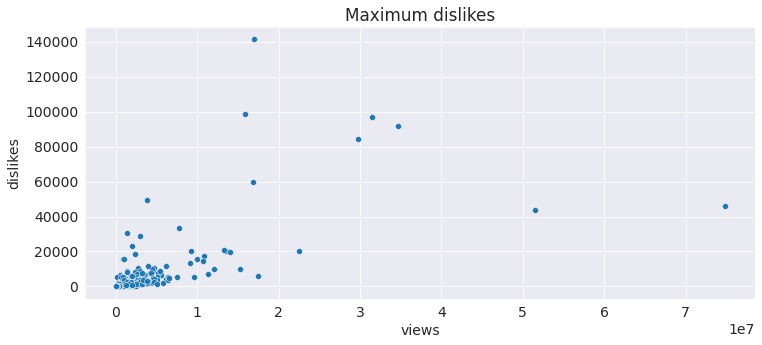

In [34]:
sns.scatterplot(x=s_df.views,y=s_df.dislikes);
plt.title('Maximum dislikes');

From above plot we can easily find that video which has maximum dislikes is nearabout 120000.


#### Q5:  What is the total views,dislikes, comments, likes on the basis of category id?

In [35]:
c_d=df.groupby('category_id')[['likes','dislikes','comment_count','views']].sum()
c_d

,likes,dislikes,comment_count,views
category_id,,,,
1,77802003,3111259,10086573,2939060844
2,4732114,197776,1016188,200066074
10,564447530,22098190,52435252,13179850194
15,8830736,185003,1823538,235592173
17,59449419,3286369,7661342,2997652188
19,3750914,129861,609953,143746952
20,51726552,2446882,9664887,1241532385
22,105388564,9480796,16818201,3228227926
23,196046674,5372515,19638776,3708438785


From above table we can easily find that  category 10 has highest likes, category 24 has highest dislikes,views and comments.

# **CONCLUSION**

From our analysis we can conclude the following points:

1:  Trending videos are on the basis of views and not on the basis of likes.

2:  Videos  with highest views have lowest comments.

3:  As data has random entries so we can't conclude a relationship between view,likes,dislikes.

Let us save and upload our work to Jovian before continuing.

In [37]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sainisachin393/new" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sainisachin393/new
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
